## Prediction of Material Categories of 3D CAD Parts: A Machine Learning Approach
### Hossein Basereh Taramsari

## Phase 2 - Prediction Model

### Step 1: Dataset

In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    precision_score, recall_score, f1_score,
    plot_confusion_matrix, roc_curve, auc
)
from sklearn.impute import SimpleImputer
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import learning_curve
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the cleaned data
df = pd.read_csv("datacl.csv")
df = df.drop("type", axis=1) # Not required for this analysis

# Convering the categorical data into numerical
label_encoder = LabelEncoder()
df['categories'] = label_encoder.fit_transform(df['categories'])
df['industries'] = label_encoder.fit_transform(df['industries'])
df['material'] = label_encoder.fit_transform(df['material'])

#Shuffle
df = df.sample(frac=1).reset_index(drop=True)

df.dropna()

# Final Dataset
df

,name,center_of_mass_x,center_of_mass_y,center_of_mass_z,area,volume,edge_count,face_count,loop_count,body_count,assembly_area,assembly_volume,assembly_density,assembly_mass,categories,industries,material
0,Body41,9.918603e+01,6.553717e+00,-4.089400e+01,23.941928,8.687500,2982,1520,2006,90,3.042419e+04,1.524040e+04,0.003024,46.087499,582,25,2
1,Body95,-1.791171e+01,-5.968657e+00,0.000000e+00,6.911694,0.906259,1945,948,990,151,1.235151e+04,1.278911e+04,0.007850,100.394481,184,25,2
2,Body1,2.874388e+00,-2.896955e+00,2.840447e+00,353.692506,192.923185,32009,14555,19501,416,2.096151e+04,2.083906e+04,0.007850,163.586585,202,25,2
3,Body1,1.043067e+01,-3.810000e-12,-9.080000e-17,72.178239,19.573921,731,520,902,25,2.739566e+03,7.134119e+02,0.004313,3.076699,202,25,1
4,Body119,3.582464e+02,6.520000e-16,-5.270000e+02,18597.232220,2787.892833,6431,2631,3534,221,3.633462e+06,2.895818e+06,0.001856,5374.959013,202,25,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117358,Body25,-1.930000e-15,8.814786e+00,8.133466e+00,1.851674,0.064747,4159,2117,2659,122,3.135536e+03,6.738822e+02,0.007850,5.289975,23,22,1
117359,Body1,5.000000e-02,3.750000e+00,2.300000e+00,5.380000,0.220000,291,150,191,13,6.892994e+02,1.515667e+02,0.007850,1.189798,202,25,2
117360,Body1,2.822815e+01,-1.796683e+01,2.067055e+01,5044.497056,29335.644580,5735,2033,2266,46,2.053908e+05,2.076686e+05,0.007850,1630.198644,563,25,2
117361,Body19,7.949888e-01,2.184214e+00,1.800000e+00,1.050403,0.046107,260,129,138,19,8.336968e+01,8.202140e+00,0.007850,0.064387,202,25,5


### Step 2: Selection of Features and Train and Test Split

In [3]:
features = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z' ,'area', 'volume',"categories" ,"industries"]
X = df[features]  # Features
y = df['material']  # Target variable

# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Machine Learning Algorithms

#### 1. Logistic Regression

In [4]:
# logistic regression model
lgmodel = LogisticRegression(max_iter=1000, random_state=42)
lgmodel.fit(X_train_scaled, y_train)
y_pred = lgmodel.predict(X_test_scaled)

In [5]:
# Evaluation
lgaccuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}".format(lgaccuracy))
print("Classification Report:\n", classification_rep)

Accuracy: 0.31
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1832
           1       0.40      0.00      0.01      1304
           2       0.31      1.00      0.47      7280
           3       0.84      0.01      0.02      2905
           4       0.00      0.00      0.00      5072
           5       0.00      0.00      0.00      3421
           6       0.00      0.00      0.00      1659

    accuracy                           0.31     23473
   macro avg       0.22      0.14      0.07     23473
weighted avg       0.22      0.31      0.15     23473



#### 2. Random Forest

In [6]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [7]:
# Evaluation
rfaccuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {rfaccuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.62      0.71      1832
           1       0.83      0.58      0.69      1304
           2       0.70      0.84      0.76      7280
           3       0.83      0.69      0.75      2905
           4       0.69      0.75      0.72      5072
           5       0.75      0.68      0.71      3421
           6       0.80      0.72      0.75      1659

    accuracy                           0.74     23473
   macro avg       0.77      0.70      0.73     23473
weighted avg       0.75      0.74      0.74     23473



#### 3. Decision Tree

In [8]:
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
y_tree_pred = tree_model.predict(X_test)


In [9]:
# Evaluation
tree_accuracy = accuracy_score(y_test, y_tree_pred)
tree_classification_rep = classification_report(y_test, y_tree_pred)

print(f"Decision Tree Accuracy: {tree_accuracy:.2f}")
print("Decision Tree Classification Report:\n", tree_classification_rep)

Decision Tree Accuracy: 0.66
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.59      0.58      1832
           1       0.58      0.57      0.57      1304
           2       0.72      0.73      0.73      7280
           3       0.65      0.66      0.65      2905
           4       0.66      0.65      0.65      5072
           5       0.61      0.61      0.61      3421
           6       0.67      0.66      0.66      1659

    accuracy                           0.66     23473
   macro avg       0.64      0.64      0.64     23473
weighted avg       0.66      0.66      0.66     23473



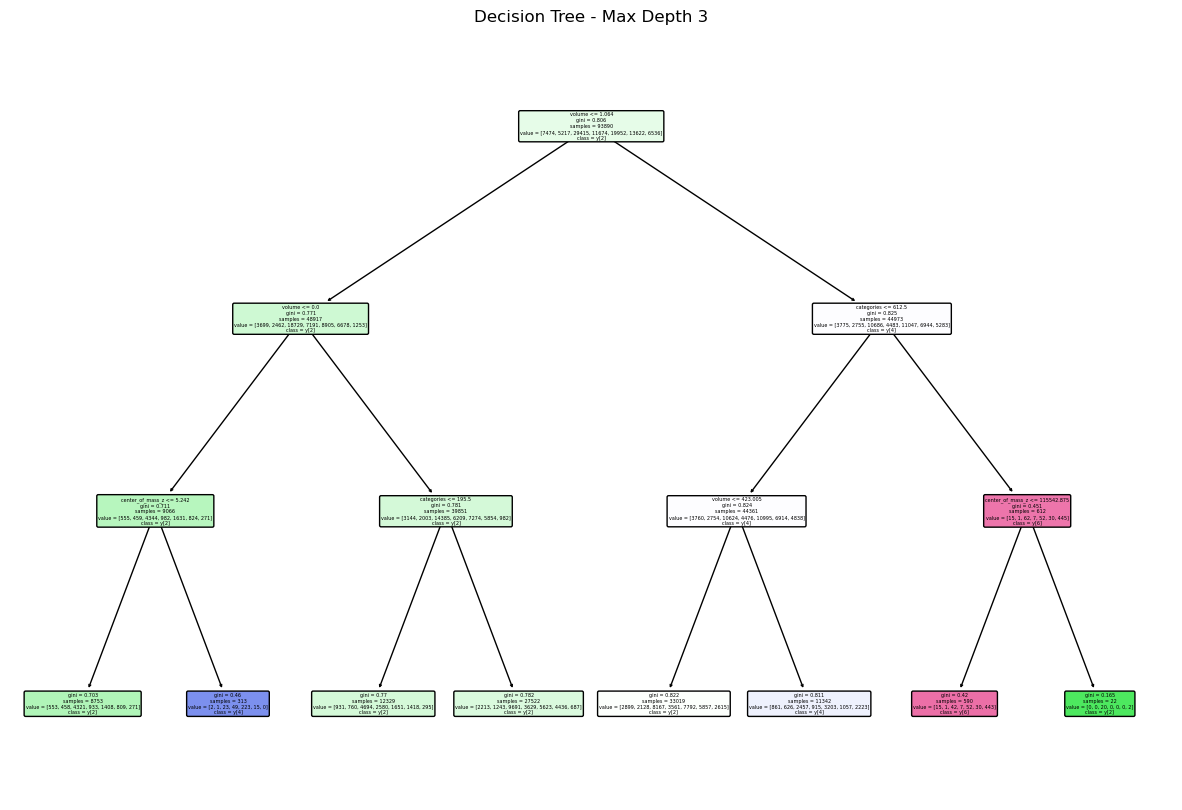

In [10]:
max_depth_limit = 3
tree_model = DecisionTreeClassifier(max_depth=max_depth_limit)
tree_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=X_train.columns, class_names=True, rounded=True)
plt.title(f'Decision Tree - Max Depth {max_depth_limit}')
plt.show()


#### 4. Neural Network

In [11]:
# Neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(len(label_encoder.classes_), activation='softmax') 
])

# Compile
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train 
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
2348/2348 [==============================] - 5s 2ms/step - loss: 1.7650 - accuracy: 0.3143 - val_loss: 1.7425 - val_accuracy: 0.3187
Epoch 2/10
2348/2348 [==============================] - 3s 1ms/step - loss: 1.7438 - accuracy: 0.3193 - val_loss: 1.7313 - val_accuracy: 0.3225
Epoch 3/10
2348/2348 [==============================] - 3s 1ms/step - loss: 1.7372 - accuracy: 0.3228 - val_loss: 1.7236 - val_accuracy: 0.3305
Epoch 4/10
2348/2348 [==============================] - 3s 1ms/step - loss: 1.7306 - accuracy: 0.3258 - val_loss: 1.7177 - val_accuracy: 0.3295
Epoch 5/10
2348/2348 [==============================] - 3s 1ms/step - loss: 1.7261 - accuracy: 0.3278 - val_loss: 1.7184 - val_accuracy: 0.3326
Epoch 6/10
2348/2348 [==============================] - 3s 1ms/step - loss: 1.7225 - accuracy: 0.3292 - val_loss: 1.7197 - val_accuracy: 0.3338
Epoch 7/10
2348/2348 [==============================] - 3s 1ms/step - loss: 1.7190 - accuracy: 0.3313 - val_loss: 1.7081 - val_accuracy:

In [12]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print(f'\nTest accuracy: {test_acc}')

# Make predictions
predictions = model.predict(X_test_scaled)

734/734 [==============================] - 1s 1ms/step - loss: 1.7371 - accuracy: 0.3323

Test accuracy: 0.3322966694831848
734/734 [==============================] - 1s 972us/step


### Step 4: Comparison of Algorithms and Selection

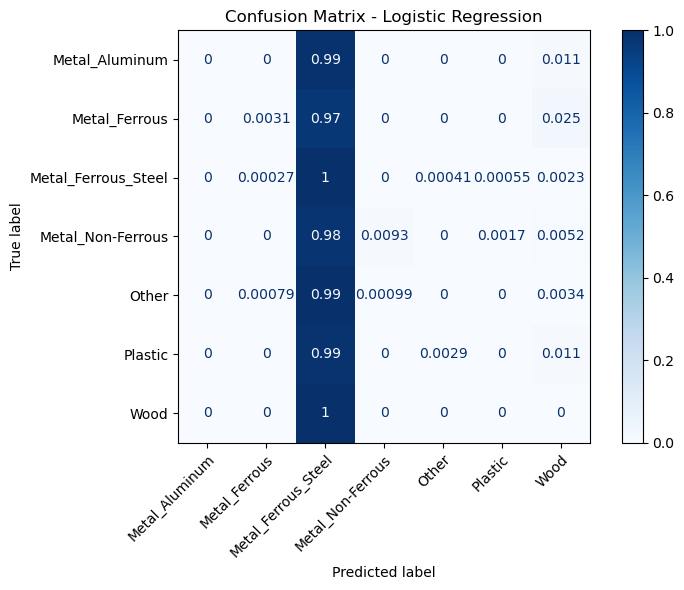

In [13]:
# Confusion Matrix - Logistic Regression
fig, ax = plt.subplots(figsize=(8, 6))
pcm = plot_confusion_matrix(lgmodel, X_test_scaled, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title('Confusion Matrix - Logistic Regression')
plt.tight_layout()
plt.show()

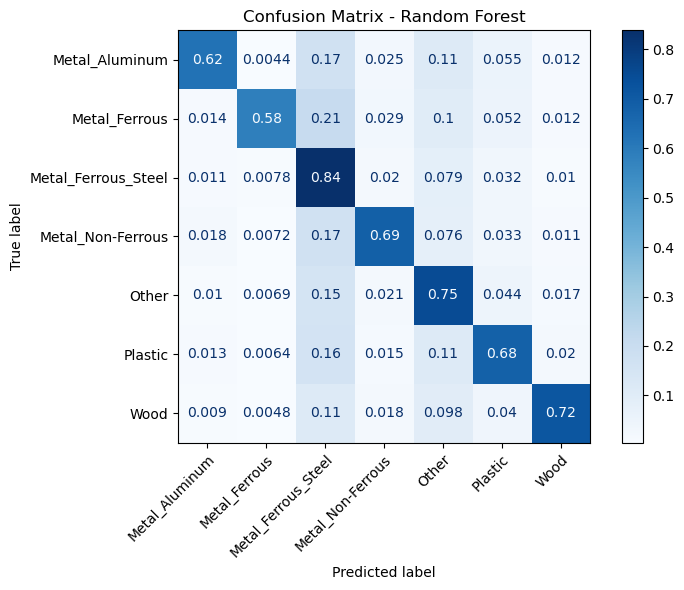

In [14]:
# Confusion Matrix - Random Forest
fig, ax = plt.subplots(figsize=(8, 6))
pcm = plot_confusion_matrix(rf_model, X_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

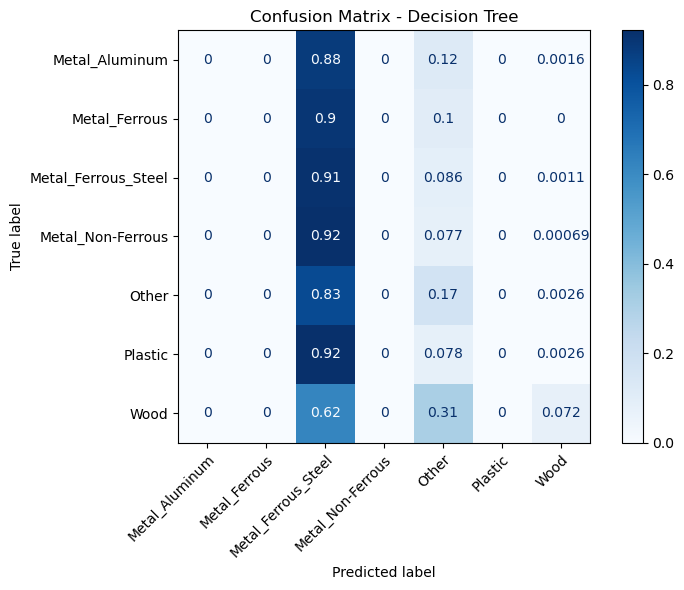

In [15]:
# Confusion Matrix - Decision Tree
fig, ax = plt.subplots(figsize=(8, 6))
pcm = plot_confusion_matrix(tree_model, X_test, y_test, display_labels=label_encoder.classes_, cmap=plt.cm.Blues, normalize='true', ax=ax)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.title('Confusion Matrix - Decision Tree')
plt.tight_layout()
plt.show()


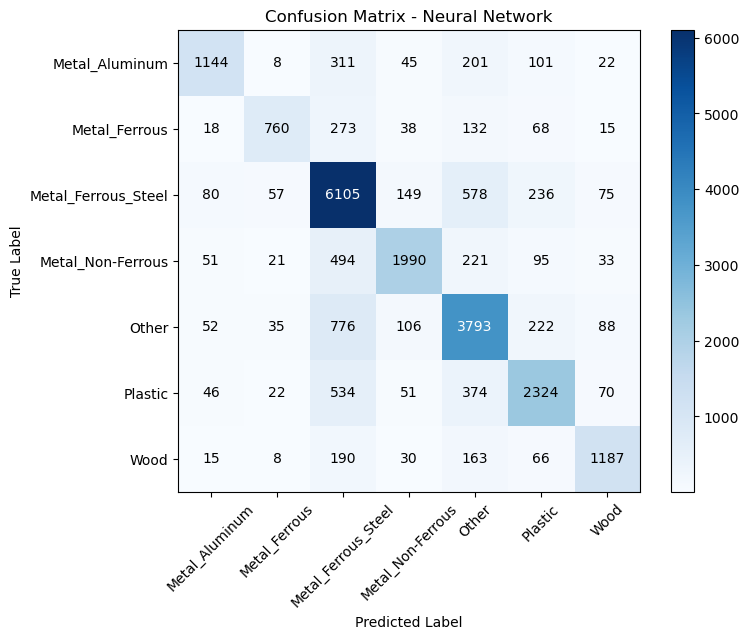

In [16]:
# Confusion Matrix - Neural Network
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Neural Network')
plt.colorbar()
classes = label_encoder.classes_
tick_marks = range(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2 else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

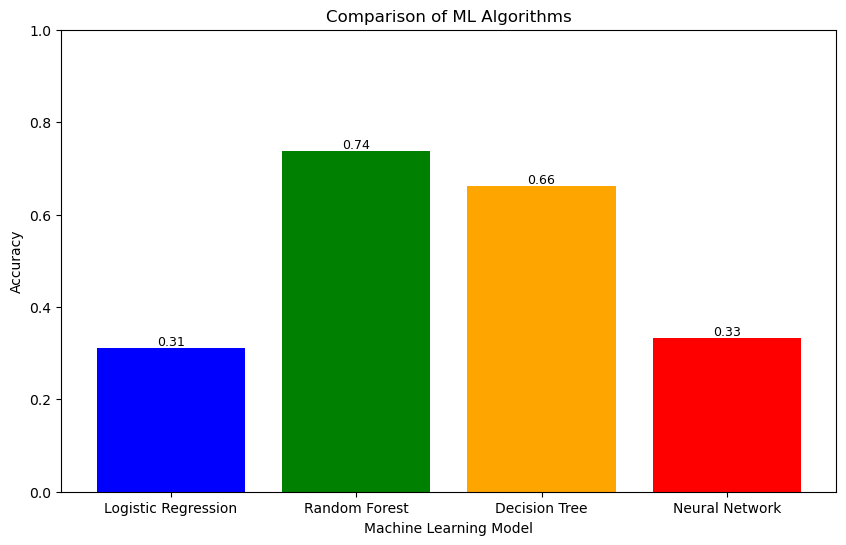

In [17]:
# Accuracy Comparison
accuracies = [lgaccuracy, rfaccuracy, tree_accuracy, test_acc]
models = ["Logistic Regression", "Random Forest", "Decision Tree", "Neural Network"]

# Plotting the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Machine Learning Model')
plt.ylabel('Accuracy')
plt.title('Comparison of ML Algorithms')
plt.ylim([0, 1]) 

for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{accuracy:.2f}', 
             ha='center', va='bottom', fontsize=9, color='black')
plt.show()


According to the results obtained the Random Forest Model provides the highest accuracy compared to the other three models. 

### Step 5: Improvement of Random Forest Model

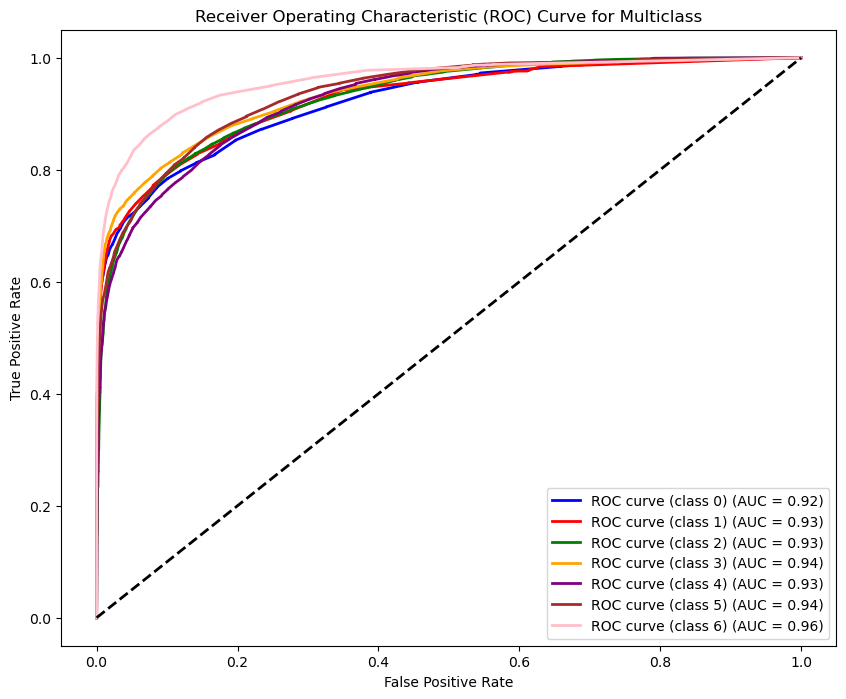

In [18]:
# Receiver Operating Characteristic (ROC) Curve

n_classes = len(np.unique(y_test))
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Train the model and predict probabilities
rf_model.fit(X_train, y_train)
y_score = rf_model.predict_proba(X_test)

# ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink'] 

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (class {0}) (AUC = {1:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


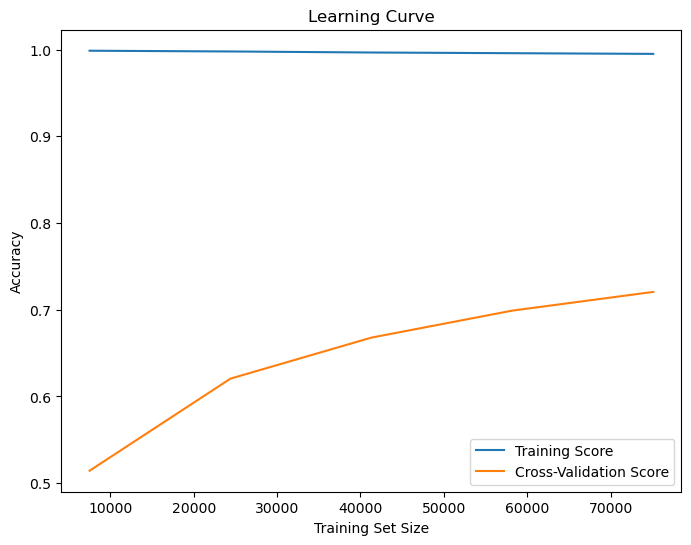

In [19]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.show()


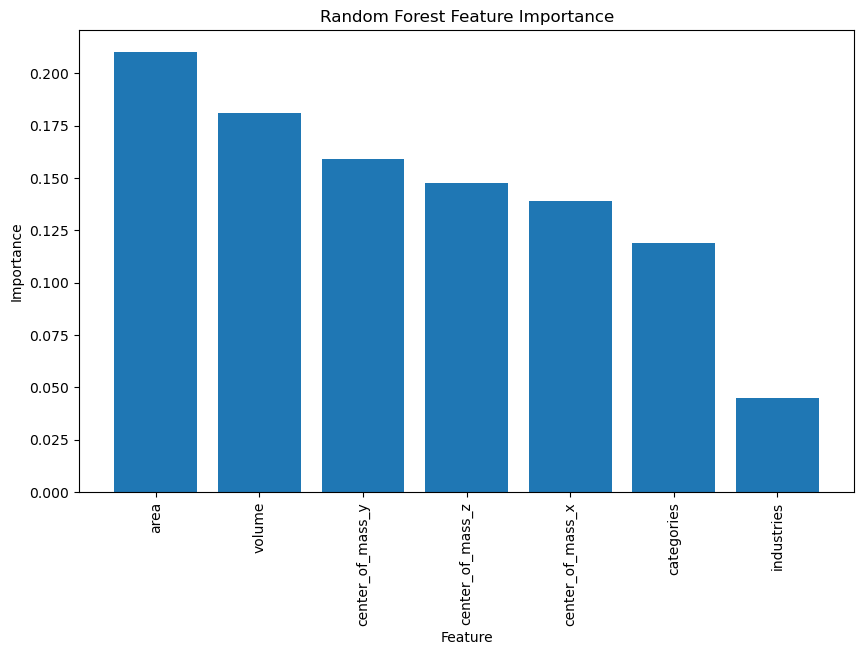

In [20]:
# Feature Importance
features = X_train.columns
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [21]:
features = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', "assembly_area" ,"assembly_volume" ,"assembly_density" ,"assembly_mass" ,'area', 'volume',"categories" ,"industries"]
X = df[features]  
y = df['material'] 

# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Infinite values
X_train_imputed[~np.isfinite(X_train_imputed)] = 0  
X_test_imputed[~np.isfinite(X_test_imputed)] = 0

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Random Forest model
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
rfaccuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {rfaccuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.54      0.61      1832
           1       0.75      0.51      0.61      1304
           2       0.59      0.81      0.69      7280
           3       0.73      0.57      0.64      2905
           4       0.65      0.63      0.64      5072
           5       0.67      0.56      0.61      3421
           6       0.78      0.58      0.66      1659

    accuracy                           0.65     23473
   macro avg       0.70      0.60      0.64     23473
weighted avg       0.67      0.65      0.65     23473



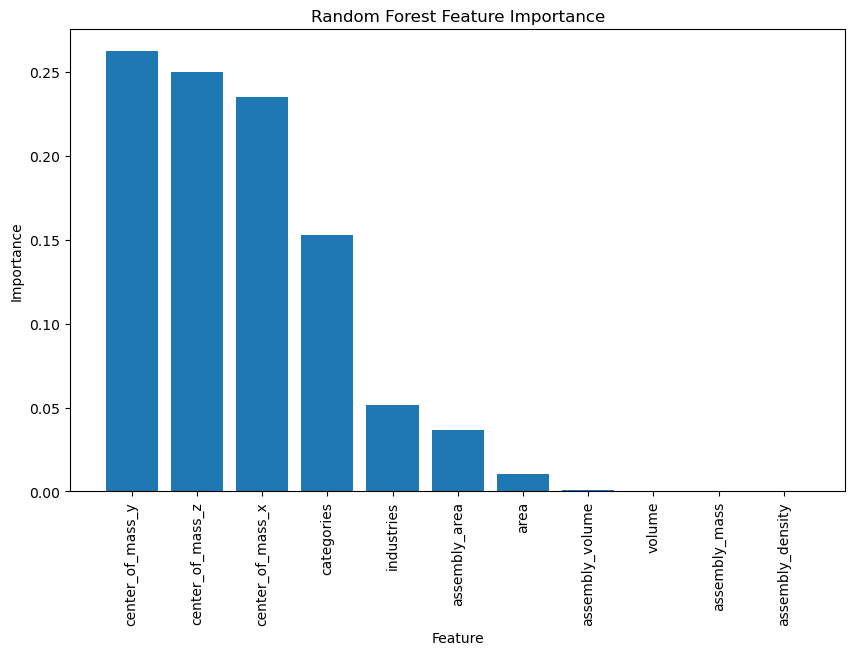

In [22]:
features = X_train.columns
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()


In [23]:
# Trying more features = "edge_count","face_count" ,"loop_count" ,"body_count"
features = ['center_of_mass_x', 'center_of_mass_y', 'center_of_mass_z', "edge_count","face_count" ,"loop_count" ,"body_count" ,'area', 'volume',"categories" ,"industries"]
X = df[features]  
y = df['material']  

# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Handle infinite values
X_train_imputed[~np.isfinite(X_train_imputed)] = 0  
X_test_imputed[~np.isfinite(X_test_imputed)] = 0

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Now, fit your model
rf_model.fit(X_train_scaled, y_train)
y_pred = rf_model.predict(X_test_scaled)

# Evaluation
rfaccuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {rfaccuracy:.2f}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73      1832
           1       0.84      0.78      0.81      1304
           2       0.78      0.84      0.81      7280
           3       0.79      0.74      0.76      2905
           4       0.78      0.78      0.78      5072
           5       0.76      0.75      0.76      3421
           6       0.86      0.78      0.82      1659

    accuracy                           0.78     23473
   macro avg       0.79      0.77      0.78     23473
weighted avg       0.78      0.78      0.78     23473



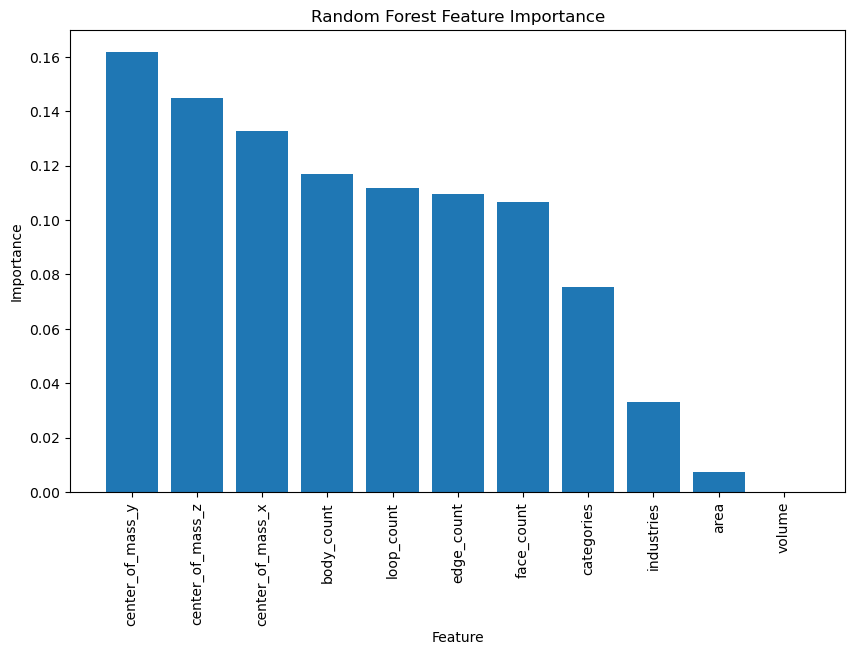

In [24]:
features = X_train.columns
importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Random Forest Feature Importance')
plt.show()


#### Hyperparameter Tuning with Grid Search

In [25]:
# Using smaller subset of data for faster experimentation
X_train_sub, _, y_train_sub, _ = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Parameter to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_sub, y_train_sub)

# Best parameters and fitting the model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluation - test set
y_pred_tuned = best_rf_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy after Hyperparameter Tuning: {accuracy_tuned:.2f}")



Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy after Hyperparameter Tuning: 0.81
